In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Ellipse
from matplotlib.gridspec import GridSpec

%matplotlib inline 

In [10]:
# set the betweeen, within, cross-sectional distribution colors and alpha for plotting
dist_c = ['#66c2a5','#fc8d62','#8da0cb']
dist_alpha = [0.4,0.4,0.4]

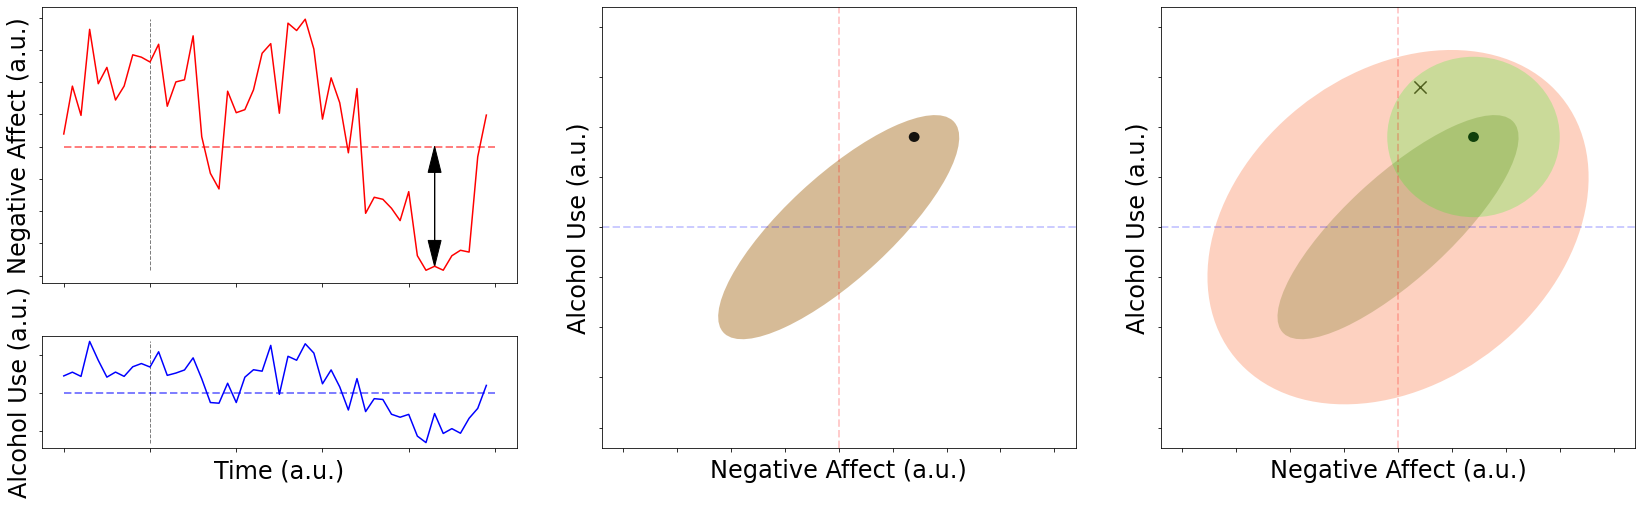

In [14]:
# Figure 1


def genTimeCourse(limits,rng,t):

    y = [rng.uniform(-limits,limits)]

    for time in np.arange(len(t)-1):
        delta = rng.normal(y[-1],0.5)

        # resample untile within limits
        while delta > limits:
            delta = rng.normal(y[-1],0.1)

        while delta < -limits:
            delta = rng.normal(y[-1],0.1)

        new_y = delta

        y.append(new_y)

    return y
    
t = np.arange(0,50,1)
rng = np.random.RandomState(seed=0)
limits = 1
    
NA = genTimeCourse(limits,rng,t)
# plt.plot(t,NA);
# plt.ylim(-3,3)

# get AU to be corrected with NA!
rng = np.random.RandomState(seed=0)

AU = []
for iY in NA:
    AU.append(rng.normal(iY,0.2))
    
    
# create figure

fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3, ncols=3)

# vertical line time
vline_time = 10

setfontsize = 24

########################################################################################
# First axes
ax0_c = 'r'
ax0 = fig.add_subplot(gs[0:2, 0])
ax0.plot(t, NA,
         color = ax0_c)
ax0.hlines(y=0, 
           xmin=0, 
           xmax=50, 
           linestyles='--',
           linewidth=2, 
           color=ax0_c,
           alpha =0.5)
ax0.vlines(x=vline_time, 
           ymin=np.min(NA), 
           ymax=np.max(NA), 
           linestyles='--',
           linewidth=1, 
           color='black',
           alpha =0.5)

state_time = 43
ax0.arrow(t[state_time], 0, 0, NA[state_time], 
          head_width=1.5, 
          head_length=0.2, linewidth=1, color='black', length_includes_head=True)
ax0.arrow(t[state_time], NA[state_time], 0, -NA[state_time], 
          head_width=1.5, 
          head_length=0.2, linewidth=1, color='black', length_includes_head=True)

ax0.set_yticklabels([])
ax0.set_xticklabels([])

ax0.set_ylabel('Negative Affect (a.u.)', fontsize=setfontsize)

########################################################################################
# Second axes
ax1_c = 'b'
ax1 = fig.add_subplot(gs[2, 0])
ax1.plot(t, AU,
        color = ax1_c)
ax1.hlines(y=0, 
           xmin=0, 
           xmax=50, 
           linestyles='--',
           linewidth=2, 
           color=ax1_c,
           alpha =0.5)
ax1.vlines(x=vline_time, 
           ymin=np.min(AU), 
           ymax=np.max(AU), 
           linestyles='--',
           linewidth=1, 
           color='black',
           alpha =0.5)

ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax1.set_xlabel('Time (a.u.)', fontsize=setfontsize)
ax1.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)

########################################################################################
# # third
ax2 = fig.add_subplot(gs[:, 1])
ellipse2 = Ellipse((0, 0), 1, 3, angle=-45, alpha=0.9, facecolor = 'tan')
ax2.add_artist(ellipse2)

ax2.set_yticklabels([])
ax2.set_xticklabels([])

# ax2.set_aspect('equal')
ax2.set_xlim(-2.2, 2.2)
ax2.set_ylim(-2.2, 2.2)

ax2.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax2.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)

ax2.hlines(y=0, 
           xmin=-2.2, 
           xmax=2.2, 
           linestyles='--',
           linewidth=2, 
           color=ax1_c,
           alpha =0.2)
ax2.vlines(x=0, 
           ymin=-2.2, 
           ymax=2.2, 
           linestyles='--',
           linewidth=2, 
           color=ax0_c,
           alpha =0.2)

# add example point!
point2 = Ellipse((0.7, 0.9), 0.1, 0.1, angle=0, alpha=0.9, facecolor = 'black')
ax2.add_artist(point2)

########################################################################################
# fourth
ax3 = fig.add_subplot(gs[:, 2])
ellipse3 = Ellipse((0, 0), 3, 4, angle=-45, alpha=dist_alpha[1], facecolor = dist_c[1])
ax3.add_artist(ellipse3)

ax3.set_yticklabels([])
ax3.set_xticklabels([])

# ax3.set_aspect('equal')
ax3.set_xlim(-2.2, 2.2)
ax3.set_ylim(-2.2, 2.2)

ax3.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax3.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)


ax3.hlines(y=0, 
           xmin=-2.2, 
           xmax=2.2, 
           linestyles='--',
           linewidth=2, 
           color=ax1_c,
           alpha =0.2)
ax3.vlines(x=0, 
           ymin=-2.2, 
           ymax=2.2, 
           linestyles='--',
           linewidth=2, 
           color=ax0_c,
           alpha =0.2)

# add unattenuated plot
ellipse2 = Ellipse((0, 0), 1, 3, angle=-45, alpha=0.9, facecolor = 'tan')
ax3.add_artist(ellipse2)

point2 = Ellipse((0.7, 0.9), 0.1, 0.1, angle=0, alpha=0.9, facecolor = 'black')
ax3.add_artist(point2)

# add error circle and actual observed point as x!
ellipse2 = Ellipse((0.7, 0.9), 1.6, 1.6, angle=0, alpha=0.2, facecolor = 'lime')
ax3.add_artist(ellipse2)

ax3.scatter(0.2, 1.4, color = 'black', alpha = 1, marker = 'x', s = 150)

########################################################################################

plt.tight_layout(pad=5.0)
plt.show()

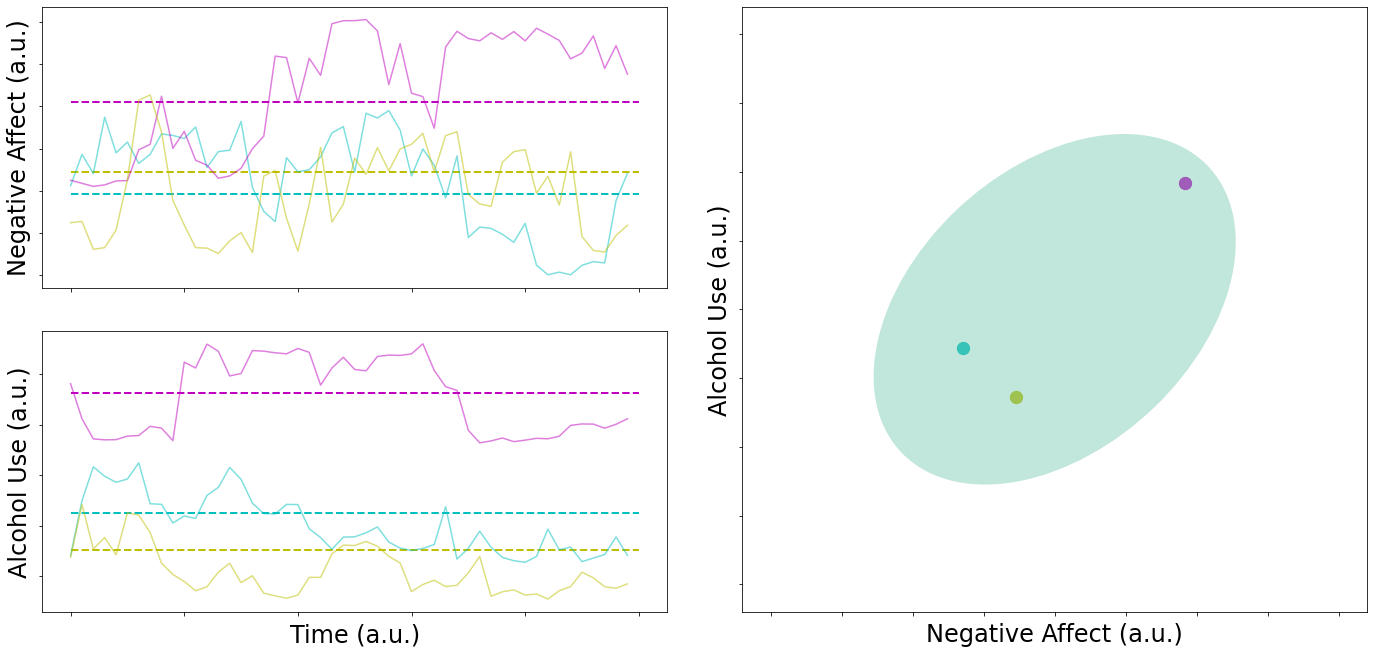

In [18]:
# Figure 2    
t = np.arange(0,50,1)
rng = np.random.RandomState(seed=0)
limits = 1

N_subj = 3

time_courses = []
for iSubj in np.arange(N_subj*2):
    iTimeCourse = genTimeCourse(limits,rng,t)
    time_courses.append(iTimeCourse)
    
# sample traits from correlated distribution! and add the trait offset to each time course!
rng = np.random.RandomState(seed=0)
bs_corr = 0.95
bs_var = 5

bs_cov = bs_corr*np.sqrt(bs_var*bs_var) 
bs_cov_mat = np.array([[bs_var,bs_cov],
                       [bs_cov,bs_var]])

latent_data = rng.multivariate_normal((0,0),bs_cov_mat,N_subj)


# rescale trait data for plotting!
latent_data_zscored = stats.zscore(latent_data, axis=0)
latent_data_zscored = latent_data_zscored/1.5


# create figure
fig = plt.figure(figsize=(20,10))
gs = GridSpec(nrows=2, ncols=2, 
#               width_ratios=[3, 1], 
#               height_ratios=[3, 1,1],
              
             )

subj_colors = ['c','m','y']
setfontsize = 24

########################################################################################

# First axes
ax0 = fig.add_subplot(gs[0, 0])

for iSubj in np.arange(N_subj):
    ax0.plot(t,np.array(time_courses[iSubj])+latent_data[iSubj,0],
             alpha = 0.5,
             color=subj_colors[iSubj]
            )
    ax0.hlines(y=latent_data[iSubj,0], 
           xmin=0, 
           xmax=50, 
           linestyles='--',
           linewidth=2,
           alpha = 1,
           color=subj_colors[iSubj]
              )

ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.set_ylabel('Negative Affect (a.u.)', fontsize=setfontsize)

########################################################################################

# second axes
ax1 = fig.add_subplot(gs[1, 0])

for iSubj in np.arange(N_subj):
    ax1.plot(t,np.array(time_courses[iSubj+N_subj])+latent_data[iSubj,1],
             alpha = 0.5,
             color=subj_colors[iSubj]
             )
    ax1.hlines(y=latent_data[iSubj,1], 
           xmin=0, 
           xmax=50, 
           linestyles='--',
           linewidth=2, 
           alpha = 1,
           color=subj_colors[iSubj]
              )

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xlabel('Time (a.u.)', fontsize=setfontsize)
ax1.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)

########################################################################################

# third axes
ax2 = fig.add_subplot(gs[:, 1])
ellipse2 = Ellipse((0, 0), 2, 3, angle=-45, alpha=dist_alpha[0], facecolor = dist_c[0])
ax2.add_artist(ellipse2)

ax2.set_yticklabels([])
ax2.set_xticklabels([])

ax2.set_xlim(-2.2, 2.2)
ax2.set_ylim(-2.2, 2.2)

ax2.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax2.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)

for iSubj in np.arange(N_subj):
    ax2.scatter(latent_data_zscored[iSubj,0], 
                latent_data_zscored[iSubj,1], 
                alpha = 0.9, 
                s = 150, 
                color = subj_colors[iSubj]
                )

plt.tight_layout(pad=4)
plt.show()

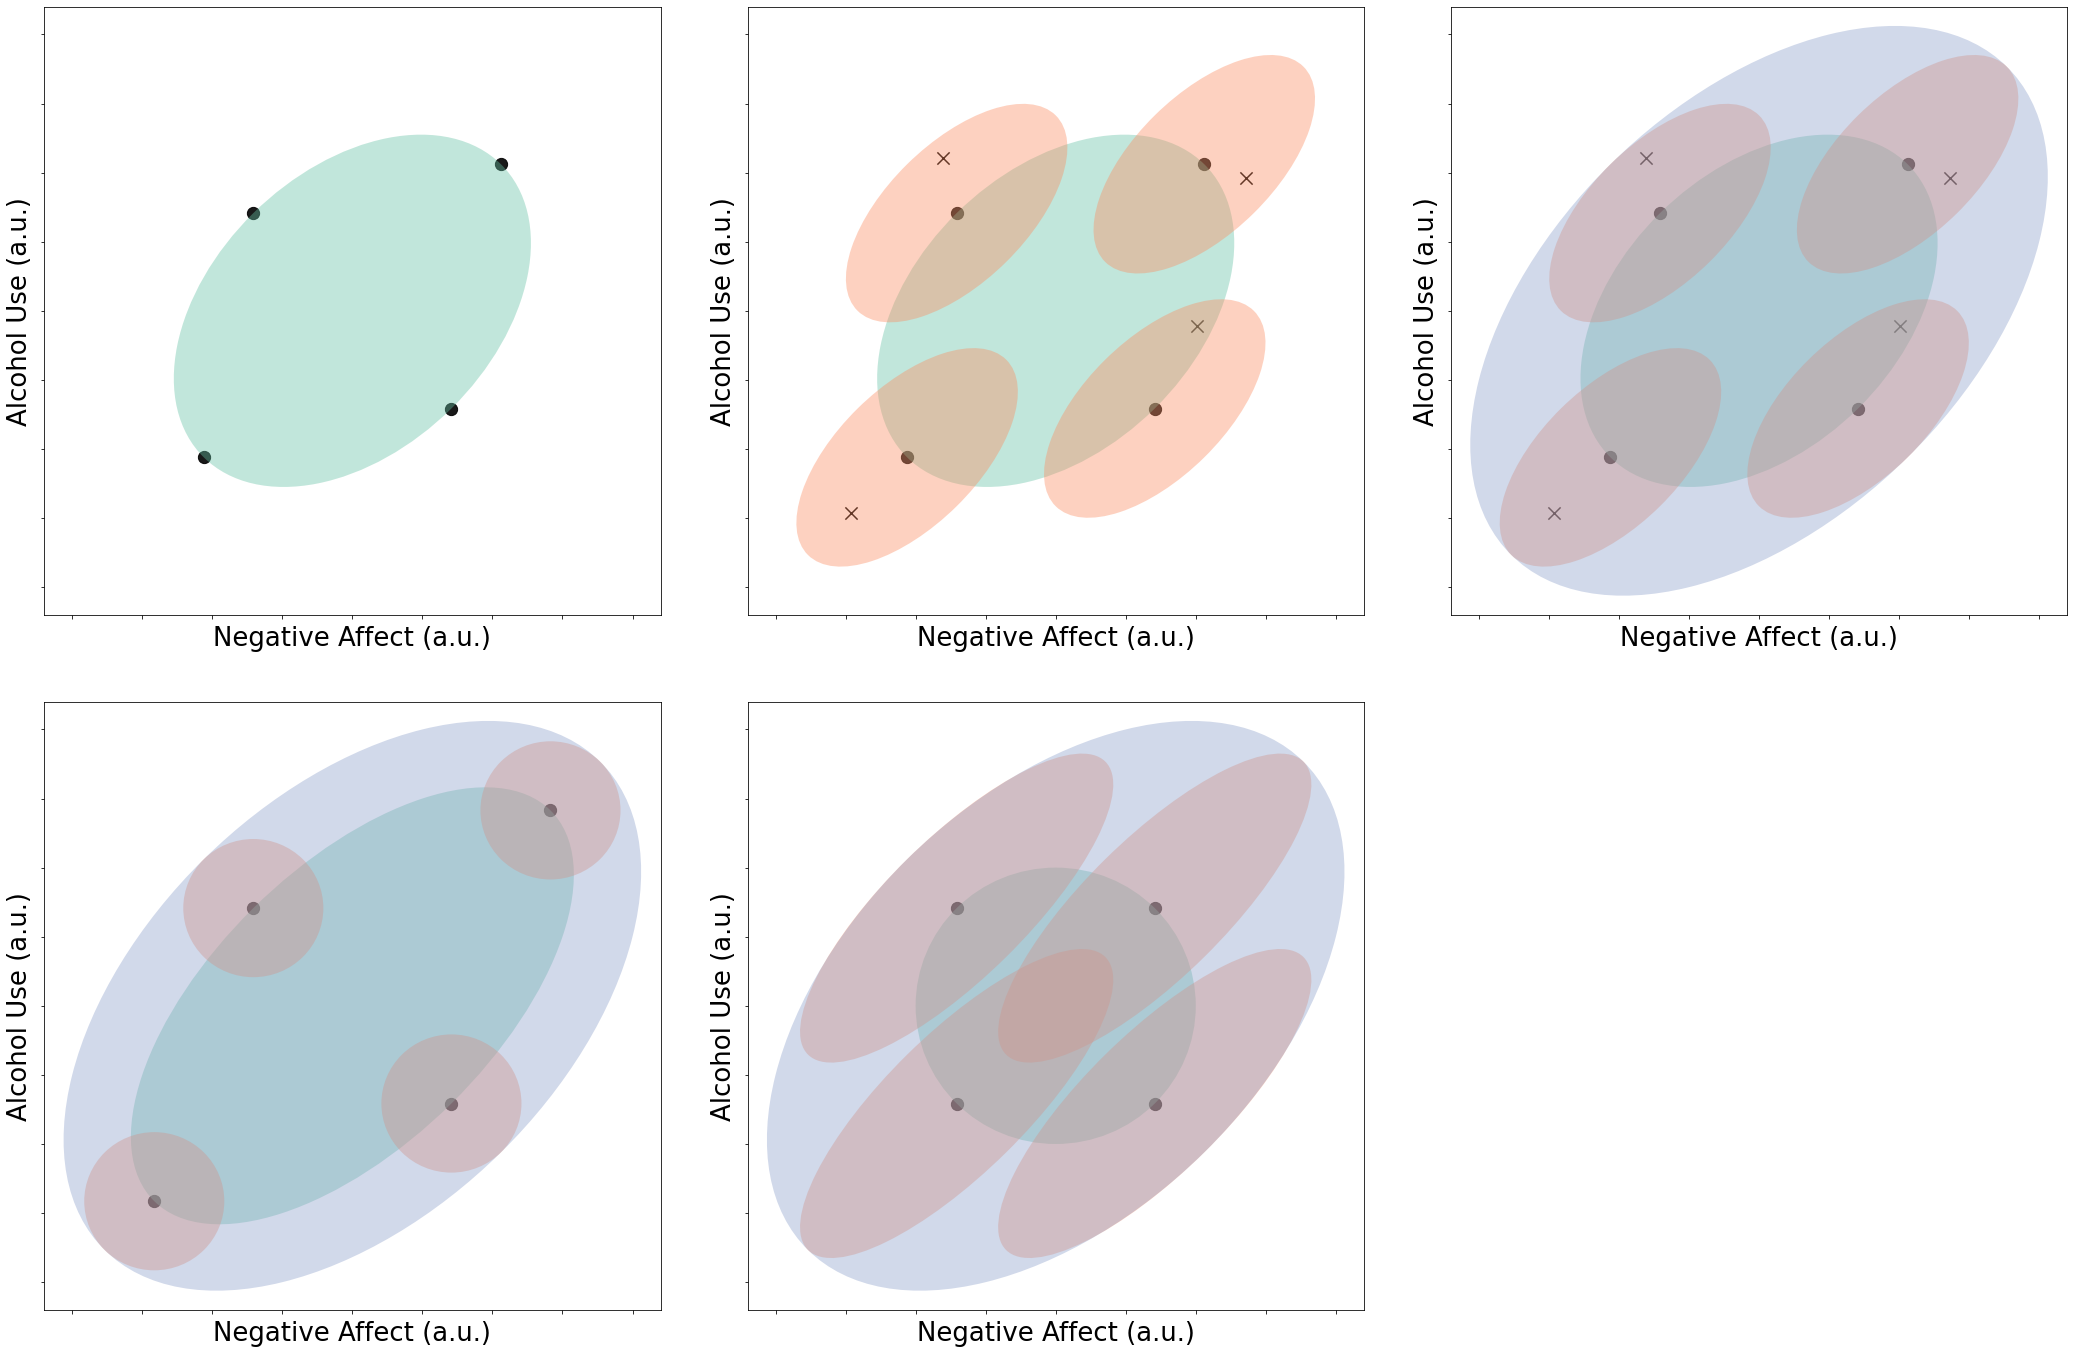

In [19]:
# Figure 3

N_subj = 4

fig = plt.figure(figsize=(30,20))
gs = GridSpec(nrows=2, ncols=3)

setfontsize = 26
point_size = 150

########################################################################################

# first axes
ax0 = fig.add_subplot(gs[0, 0])
ellipse2 = Ellipse((0, 0), 2, 3, angle=-45, alpha=dist_alpha[0], facecolor = dist_c[0])
ax0.add_artist(ellipse2)

ax0.set_yticklabels([])
ax0.set_xticklabels([])

# ax2.set_aspect('equal')
ax0.set_xlim(-2.2, 2.2)
ax0.set_ylim(-2.2, 2.2)

ax0.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax0.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)


latent0 = np.array([[(3/2)/np.sqrt(2), (3/2)/np.sqrt(2)],
                    [-(3/2)/np.sqrt(2), -(3/2)/np.sqrt(2)],
                    [(2/2)/np.sqrt(2), -(2/2)/np.sqrt(2)],
                    [-(2/2)/np.sqrt(2), (2/2)/np.sqrt(2)]])

for iSubj in np.arange(N_subj):
    ax0.scatter(latent0[iSubj,0], 
                latent0[iSubj,1], 
                alpha = 0.9, 
                s = point_size, 
                color = 'black'
                )
    
########################################################################################

# second axes
ax1 = fig.add_subplot(gs[0, 1])
ellipse2 = Ellipse((0, 0), 2, 3, angle=-45, alpha=dist_alpha[0], facecolor = dist_c[0])
ax1.add_artist(ellipse2)

ax1.set_yticklabels([])
ax1.set_xticklabels([])

# ax2.set_aspect('equal')
ax1.set_xlim(-2.2, 2.2)
ax1.set_ylim(-2.2, 2.2)

ax1.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax1.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)


for iSubj in np.arange(N_subj):
    
    # within x and y centers
    w_x = latent0[iSubj,0]
    w_y = latent0[iSubj,1]
    
    # add center point!
    ax1.scatter(w_x,
                w_y, 
                alpha = 0.9, 
#                 marker = 'x',
                s = point_size, 
                color = 'black'
                )
    
    
    # add within-subject distribution!
    ellipse_temp1 = Ellipse((w_x, w_y), 
                            1, 2, angle=-45, 
                            alpha=dist_alpha[1], facecolor = dist_c[1])
    ax1.add_artist(ellipse_temp1)

    # ignore the measurement error and plot actual measurment!
    w_measures = np.array([[0.3, -0.1],
                            [-0.4, -0.4],
                            [0.3, 0.6],
                            [-0.1,0.4]])
    ax1.scatter(w_x+w_measures[iSubj,0], w_y+ w_measures[iSubj,1], 
                color = 'black', alpha = 1, marker = 'x', s = point_size)
    
########################################################################################

# third axes
ax2 = fig.add_subplot(gs[0, 2])
ellipse2 = Ellipse((0, 0), 2, 3, angle=-45, alpha=dist_alpha[0], facecolor = dist_c[0])
ax2.add_artist(ellipse2)

ax2.set_yticklabels([])
ax2.set_xticklabels([])

# ax2.set_aspect('equal')
ax2.set_xlim(-2.2, 2.2)
ax2.set_ylim(-2.2, 2.2)

ax2.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax2.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)


for iSubj in np.arange(N_subj):
    
    # within x and y centers
    w_x = latent0[iSubj,0]
    w_y = latent0[iSubj,1]
    
    # add center point!
    ax2.scatter(w_x,
                w_y, 
                alpha = 0.9, 
#                 marker = 'x',
                s = point_size, 
                color = 'black'
                )
    
    
    # add within-subject distribution!
    ellipse_temp1 = Ellipse((w_x, w_y), 
                            1, 2, angle=-45, 
                            alpha=dist_alpha[1], facecolor = dist_c[1])
    ax2.add_artist(ellipse_temp1)

    # ignore the measurement error and plot actual measurment!
    w_measures = np.array([[0.3, -0.1],
                            [-0.4, -0.4],
                            [0.3, 0.6],
                            [-0.1,0.4]])
    ax2.scatter(w_x+w_measures[iSubj,0], w_y+ w_measures[iSubj,1], 
                color = 'black', alpha = 1, marker = 'x', s = point_size)
    
# add cross-sectional distribution!
ellipse2 = Ellipse((0, 0), 3, 5, angle=-45, alpha=dist_alpha[2], facecolor = dist_c[2])
ax2.add_artist(ellipse2)


########################################################################################


# fourth axes
trait_h = 2
trait_w = 4
ax3 = fig.add_subplot(gs[1, 0])
ellipse2 = Ellipse((0, 0), trait_h, trait_w, angle=-45, alpha=dist_alpha[0], facecolor = dist_c[0])
ax3.add_artist(ellipse2)

latent0 = np.array([[(trait_w/2)/np.sqrt(2), (trait_w/2)/np.sqrt(2)],
                    [-(trait_w/2)/np.sqrt(2), -(trait_w/2)/np.sqrt(2)],
                    [(trait_h /2)/np.sqrt(2), -(trait_h /2)/np.sqrt(2)],
                    [-(trait_h /2)/np.sqrt(2), (trait_h /2)/np.sqrt(2)]])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

# ax2.set_aspect('equal')
ax3.set_xlim(-2.2, 2.2)
ax3.set_ylim(-2.2, 2.2)

ax3.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax3.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)


for iSubj in np.arange(N_subj):
    
    # within x and y centers
    w_x = latent0[iSubj,0]
    w_y = latent0[iSubj,1]
    
    # add center point!
    ax3.scatter(w_x,
                w_y, 
                alpha = 0.9, 
                s = point_size, 
                color = 'black'
                )
    
    
    # add within-subject distribution!
    ellipse_temp1 = Ellipse((w_x, w_y), 
                            1, 1, angle=-45, 
                            alpha=dist_alpha[1], facecolor = dist_c[1])
    ax3.add_artist(ellipse_temp1)
    

# add cross-sectional distribution!
ellipse2 = Ellipse((0, 0), 3, 5, angle=-45, alpha=dist_alpha[2], facecolor = dist_c[2])
ax3.add_artist(ellipse2)

########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

# fifth axes
trait_h = 2
trait_w = 2
ax4 = fig.add_subplot(gs[1, 1])
ellipse2 = Ellipse((0, 0), trait_h, trait_w, angle=-45, alpha=dist_alpha[0], facecolor = dist_c[0])
ax4.add_artist(ellipse2)

latent0 = np.array([[(trait_w/2)/np.sqrt(2), (trait_w/2)/np.sqrt(2)],
                    [-(trait_w/2)/np.sqrt(2), -(trait_w/2)/np.sqrt(2)],
                    [(trait_h /2)/np.sqrt(2), -(trait_h /2)/np.sqrt(2)],
                    [-(trait_h /2)/np.sqrt(2), (trait_h /2)/np.sqrt(2)]])

ax4.set_yticklabels([])
ax4.set_xticklabels([])

# ax2.set_aspect('equal')
ax4.set_xlim(-2.2, 2.2)
ax4.set_ylim(-2.2, 2.2)

ax4.set_xlabel('Negative Affect (a.u.)', fontsize=setfontsize)
ax4.set_ylabel('Alcohol Use (a.u.)', fontsize=setfontsize)


for iSubj in np.arange(N_subj):
    
    # within x and y centers
    w_x = latent0[iSubj,0]
    w_y = latent0[iSubj,1]
    
    # add center point!
    ax4.scatter(w_x,
                w_y, 
                alpha = 0.9, 
                s = point_size, 
                color = 'black'
                )
    
    
    # add within-subject distribution!
    ellipse_temp1 = Ellipse((w_x, w_y), 
                            1, 3, angle=-45, 
                            alpha=dist_alpha[1], facecolor = dist_c[1])
    ax4.add_artist(ellipse_temp1)
    

# add cross-sectional distribution!
ellipse2 = Ellipse((0, 0), 3, 5, angle=-45, alpha=dist_alpha[2], facecolor = dist_c[2])
ax4.add_artist(ellipse2)

plt.tight_layout(pad=5)
plt.show()